In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None) 

sdata = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate00.csv")
sdata1 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate01.csv")
sdata2 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate02.csv")
sdata3 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate10.csv")
sdata4 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate11.csv")
sdata5 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate12.csv")
sdata6 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate20.csv")
sdata7 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate21.csv")
sdata8 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate22.csv")

sdata.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata1.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata2.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata3.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata4.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata5.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata6.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata7.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata8.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']

Using TensorFlow backend.


### Data exploration

In [2]:
print(sdata.shape,
sdata1.shape,
sdata2.shape,
sdata3.shape,
sdata4.shape,
sdata5.shape,
sdata6.shape,
sdata7.shape,
sdata8.shape)


#Exploratory Data Analysis

df = pd.concat([sdata, sdata1, sdata2, sdata3,sdata4, sdata5, sdata6, sdata7, sdata8], axis=0)

df = df.reset_index(drop=True)

df.head(10000)

(2444, 6) (2774, 6) (3107, 6) (3440, 6) (3760, 6) (4090, 6) (4449, 6) (4772, 6) (5102, 6)


,TimeStamp,X,Y,Z,Magnitude,CoordinateID
0,2020-07-22 05:10:50:003,-17.34,29.519999,-20.520000,27.942548,0
1,2020-07-22 05:10:50:022,-17.40,29.279999,-20.220000,27.751907,0
2,2020-07-22 05:10:50:042,-17.22,29.699999,-20.160000,27.610759,0
3,2020-07-22 05:10:50:062,-17.22,29.279999,-20.460000,27.815462,0
4,2020-07-22 05:10:50:082,-17.58,29.279999,-20.640000,28.171368,0
...,...,...,...,...,...,...
9995,2020-07-22 05:12:17:009,-16.14,29.880000,-22.920000,29.078961,10
9996,2020-07-22 05:12:17:028,-16.38,29.880000,-23.279999,29.496147,10
9997,2020-07-22 05:12:17:048,-17.10,30.000000,-23.640000,30.187075,10
9998,2020-07-22 05:12:17:068,-17.40,30.000000,-23.640000,30.358022,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33938 entries, 0 to 33937
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeStamp     33938 non-null  object 
 1   X             33938 non-null  float64
 2   Y             33938 non-null  float64
 3   Z             33938 non-null  float64
 4   Magnitude     33938 non-null  float64
 5   CoordinateID  33938 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,X,Y,Z,Magnitude,CoordinateID
count,33938.000000,33938.000000,33938.000000,33938.000000,33938.000000
mean,-19.432219,28.383776,-21.285192,29.830513,12.825270
std,1.342536,1.098319,1.503288,1.280910,8.004043
min,-23.100000,25.019999,-25.320000,26.300540,0.000000
25%,-20.520000,27.660000,-22.560000,28.848355,10.000000
50%,-19.500000,28.260000,-21.060000,29.773443,12.000000
75%,-18.480000,29.160000,-20.160000,30.727302,21.000000
max,-15.360000,31.920000,-17.580000,33.433283,22.000000


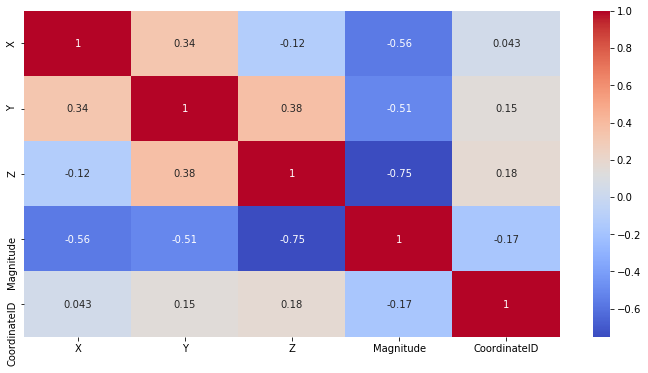

In [5]:
plt.figure(figsize = (12, 6))
sns.heatmap(df[['X', 'Y', 'Z', 'Magnitude', 'CoordinateID']].corr(), cmap = 'coolwarm', annot = True)

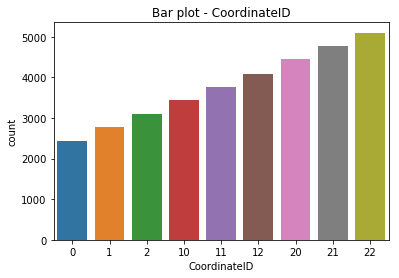

In [6]:
ax = sns.countplot(df['CoordinateID'])
plt.title('Bar plot - CoordinateID')
plt.show()

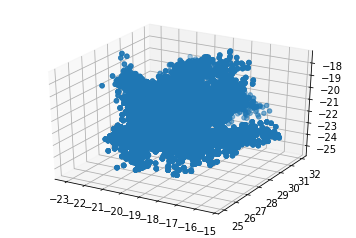

In [7]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
x, y, z = df['X'], df['Y'], df['Z']

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x,y,z,)
plt.show()

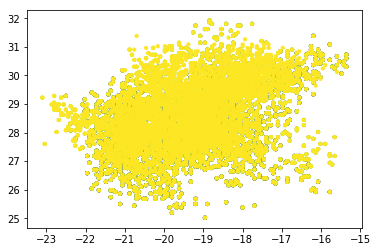

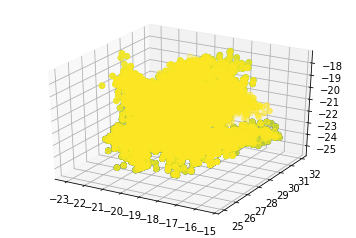

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Create Map
cm = plt.get_cmap("RdYlGn")

x, y, z = df['X'], df['Y'], df['Z']
col = df['CoordinateID']

# 2D Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, s=10, c=col, marker='o')  

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(x, y, z, s=30, c=col, marker='o')                                                                                

plt.show()

### The 3d plot above shows that the data is tightly grouped, which might lower the performance of the classifier. So we get an average of data within a window of 100 and create a new dataset.

In [9]:
grouper = df.groupby(['CoordinateID',df.reset_index().index // 10])
new_df = grouper.agg(X = ('X', 'mean'), 
                     Y = ('Y', 'mean'),
                     Z = ('Z', 'mean'),
                     Magnitude = ('Magnitude', 'mean')).reset_index(level = 0)

In [10]:
new_df

,CoordinateID,X,Y,Z,Magnitude
0,0,-17.772,29.081999,-20.532000,28.207857
1,0,-18.138,29.460000,-20.388000,28.347684
2,0,-17.382,28.722000,-20.670000,28.052604
3,0,-17.526,29.238000,-20.676000,28.164204
4,0,-17.658,28.625999,-21.180000,28.595238
...,...,...,...,...,...
3389,22,-19.284,30.263999,-20.322000,29.076082
3390,22,-19.992,30.876000,-19.295999,28.884308
3391,22,-18.990,30.449999,-19.938000,28.631046
3392,22,-18.564,30.618000,-20.388000,28.664162


In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=new_df[['X', 'Y', 'Z', 'Magnitude']]  # Features
y=new_df['CoordinateID']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2381, 4) (1021, 4) (2381,) (1021,)


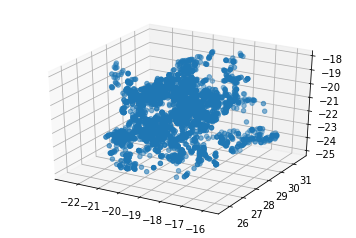

In [13]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
x, y, z = new_df['X'], new_df['Y'], new_df['Z']

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x,y,z,)
plt.show()

ValueError: Argument Z must be 2-dimensional.

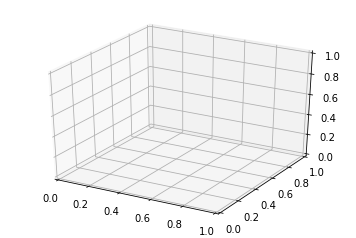

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

scale = 8
# Make data.
x, y = new_df['X'], new_df['Y']
X, Y = np.meshgrid(x,y)
Z = new_df['Z']

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                   linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 100)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# rotate the axes and update
for angle in range(0, 360):
   ax.view_init(30, 40)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

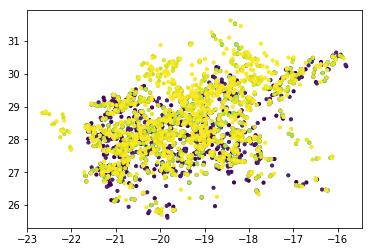

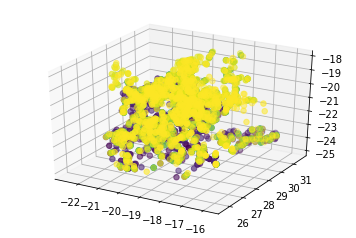

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Create Map
cm = plt.get_cmap("RdYlGn")

x, y, z = new_df['X'], new_df['Y'], new_df['Z']
col = new_df['CoordinateID']

# 2D Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, s=10, c=col, marker='o')  

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(x, y, z, s=30, c=col, marker='o')                                                                                

plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Test Score: ", knn.score(X_test, y_test))

Test Score:  0.04505386875612145


In [17]:
knn.score(X_train, y_train)

0.42125157496850063

In [18]:
from sklearn import neighbors
from math import sqrt

from sklearn import metrics
from sklearn.metrics import mean_squared_error

Knn = neighbors.KNeighborsRegressor()
Knn.fit(X_train, y_train)  
error = sqrt(metrics.mean_squared_error( y_test, Knn.predict(X_test))) 
print('RMSE value of the KNN Model is:', error)

RMSE value of the KNN Model is: 8.376411542135004


In [19]:
Knn.score(X_train, y_train) 

0.28377705187382274

In [20]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150, random_state = 42, class_weight="balanced")

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

error = sqrt(metrics.mean_squared_error( y_test, y_pred)) 
print('RMSE value of the KNN Model is:', error)

RMSE value of the KNN Model is: 11.2559484763329


In [21]:
clf.score(X_train,y_train)

0.6593868122637547

In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy1:",metrics.accuracy_score(y_test, y_pred))

Accuracy1: 0.05190989226248776


In [23]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [24]:
train_df = new_df.iloc[:,0:5]
train_df

,CoordinateID,X,Y,Z,Magnitude
0,0,-17.772,29.081999,-20.532000,28.207857
1,0,-18.138,29.460000,-20.388000,28.347684
2,0,-17.382,28.722000,-20.670000,28.052604
3,0,-17.526,29.238000,-20.676000,28.164204
4,0,-17.658,28.625999,-21.180000,28.595238
...,...,...,...,...,...
3389,22,-19.284,30.263999,-20.322000,29.076082
3390,22,-19.992,30.876000,-19.295999,28.884308
3391,22,-18.990,30.449999,-19.938000,28.631046
3392,22,-18.564,30.618000,-20.388000,28.664162


In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 0 to 3393
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CoordinateID  3402 non-null   int64  
 1   X             3402 non-null   float64
 2   Y             3402 non-null   float64
 3   Z             3402 non-null   float64
 4   Magnitude     3402 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 159.5 KB


In [38]:
train_features = train_df[['Magnitude']]
train_features.shape

(3402, 1)

In [39]:
#Scale transforms data to center to the mean and component wise scale to unit variance
train_AP_features = scale(np.asarray(train_features))

In [40]:
#Convert coordinates to  a string
coordinates = train_df['CoordinateID'].map(str)
train_labels = np.asarray(coordinates)

In [41]:
#convert labels to categorical variables, dummy_labels has type 'pandas.core.frame.DataFrame'
dummy_labels = pd.get_dummies(train_labels)
dummy_labels

,0,1,10,11,12,2,20,21,22
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3397,0,0,0,0,0,0,0,0,1
3398,0,0,0,0,0,0,0,0,1
3399,0,0,0,0,0,0,0,0,1
3400,0,0,0,0,0,0,0,0,1


In [42]:
train_labels = np.asarray(dummy_labels) #labels is an array of shape 19937 x 13.
train_labels

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [43]:
#generate len(train_AP_features) of floats in between 0 and 1
train_val_split = np.random.rand(len(train_AP_features))
#convert train_val_split to an array of booleans: if elem < 0.7 = true, else: false
train_val_split = train_val_split < 0.70 #should contain ~70% percent true

In [44]:
train_X = train_AP_features[train_val_split]
train_y = train_labels[train_val_split]
val_X = train_AP_features[~train_val_split]
val_y = train_labels[~train_val_split]

In [48]:
nb_epochs = 30
batch_size = 10
input_size = 1
num_classes = 9 #Total nine coordinates
lr = 0.001

def encoder():
    model = Sequential()
    model.add(Dense(256, input_dim=input_size, activation='tanh', bias=True))
    model.add(Dense(128, activation='tanh', bias=True))
    model.add(Dense(64, activation='tanh', bias=True))
    return model

def decoder(e):   
    e.add(Dense(128, input_dim=64, activation='tanh', bias=True))
    e.add(Dense(256, activation='tanh', bias=True))
    e.add(Dense(input_size, activation='tanh', bias=True))
    e.compile(optimizer='adam', loss='mse')
    return e

In [49]:
e = encoder()

d = decoder(e)

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1, activation="tanh", use_bias=True)`
  if __name__ == '__main__':
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="tanh", use_bias=True)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="tanh", use_bias=True)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, input_dim=64, activation="tanh", use_bias=True)`
  from ipykernel import kernelapp as app
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` 

In [50]:
d.fit(train_X, train_X, nb_epoch=nb_epochs, batch_size=batch_size)

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
2359/2359 [==============================] - 3s 1ms/step - loss: 0.1274
Epoch 2/30
2359/2359 [==============================] - 2s 838us/step - loss: 0.1078
Epoch 3/30
2359/2359 [==============================] - 1s 571us/step - loss: 0.1068
Epoch 4/30
2359/2359 [==============================] - 1s 489us/step - loss: 0.1063
Epoch 5/30
2359/2359 [==============================] - 1s 499us/step - loss: 0.1059
Epoch 6/30
2359/2359 [==============================] - 1s 504us/step - loss: 0.1052
Epoch 7/30
2359/2359 [==============================] - 1s 500us/step - loss: 0.1047
Epoch 8/30
2359/2359 [==============================] - 1s 514us/step - loss: 0.1052
Epoch 9/30
2359/2359 [==============================] - 1s 508us/step - loss: 0.1047
Epoch 10/30
2359/2359 [==============================] - 1s 510us/step - loss: 0.1046
Epoch 11/30
2359/2359 [==============================] - 1s 578us/step - loss: 0.1045
Epoch 12/30
2359/2359 [==============================] - 1s 556us

In [51]:
def classifier(d):
    d.add(Dense(128, input_dim=64, activation='tanh', bias=True))
    d.add(Dense(128, activation='tanh', bias=True))
    d.add(Dense(num_classes, activation='softmax', bias=True))
    d.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return d

In [52]:
c = classifier(d)

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, input_dim=64, activation="tanh", use_bias=True)`
  
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="tanh", use_bias=True)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(9, activation="softmax", use_bias=True)`
  after removing the cwd from sys.path.


In [53]:
c.fit(train_X, train_y, validation_data=(val_X, val_y), nb_epoch=nb_epochs, batch_size=batch_size , shuffle = True)

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 2359 samples, validate on 1043 samples
Epoch 1/30
2359/2359 [==============================] - 4s 2ms/step - loss: 2.1814 - accuracy: 0.1369 - val_loss: 2.1653 - val_accuracy: 0.1390
Epoch 2/30
2359/2359 [==============================] - 3s 1ms/step - loss: 2.1720 - accuracy: 0.1399 - val_loss: 2.1622 - val_accuracy: 0.1553
Epoch 3/30
2359/2359 [==============================] - 3s 1ms/step - loss: 2.1657 - accuracy: 0.1433 - val_loss: 2.1592 - val_accuracy: 0.1515
Epoch 4/30
2359/2359 [==============================] - 3s 1ms/step - loss: 2.1647 - accuracy: 0.1407 - val_loss: 2.1594 - val_accuracy: 0.1275
Epoch 5/30
2359/2359 [==============================] - 3s 1ms/step - loss: 2.1651 - accuracy: 0.1458 - val_loss: 2.1611 - val_accuracy: 0.1524
Epoch 6/30
2359/2359 [==============================] - 4s 2ms/step - loss: 2.1637 - accuracy: 0.1412 - val_loss: 2.1601 - val_accuracy: 0.1534
Epoch 7/30
2359/2359 [==============================] - 3s 1ms/step - loss: 2.1626 - acc

In [54]:
loss, acc = c.evaluate(train_AP_features, train_labels)
print(loss, acc)

3402/3402 [==============================] - 1s 224us/step
2.154185990948035 0.15049970149993896
